In [1]:
import numpy as np
import pandas as pd
import quaternion
import matplotlib.pyplot as plt

In [2]:
# prefix = 'hexagons/trajectories/dump_2503/cutoff-2.5/'
# file_name = prefix+'NVE-temp-2.25_K-0.018140589569161_r-0_s-5-original_traj'

prefix = 'hexagons/trajectories/inertia_issue/'
file_name = prefix+'NVE-temp-0.45_K-0.219478737997257_r-0_s-5'


df = pd.read_csv(file_name+'-original_traj.csv')

body1_atom1 = df.loc[(df['body_id'] == 1.0) & (df['id'] == 1.0), ['timestep', 'x', 'y', 'z']]
body1_atom2 = df.loc[(df['body_id'] == 1.0) & (df['id'] == 2.0), ['timestep', 'x', 'y', 'z']]
body1_atom7 = df.loc[(df['body_id'] == 1.0) & (df['id'] == 7.0), ['timestep', 'x', 'y', 'z']]


In [3]:
vec1 = body1_atom1.iloc[:, 1:].to_numpy() - body1_atom7.iloc[:, 1:].to_numpy()
vec2 = body1_atom2.iloc[:, 1:].to_numpy() - body1_atom7.iloc[:, 1:].to_numpy()

vec3 = np.cross(vec1, vec2)
vec3 = vec3 / np.linalg.norm(vec3, axis=1).reshape(-1, 1)

In [4]:
initial_vec = np.array([0, 0, 1])

abc = np.cross(initial_vec, vec3)

w = np.sqrt((np.linalg.norm(initial_vec) ** 2) * (np.linalg.norm(vec3, axis=1) ** 2)) + np.dot(initial_vec, vec3.reshape(3, -1))


q = np.hstack((w.reshape(-1, 1), abc))
q = q / np.linalg.norm(q, axis=1).reshape(-1, 1)


In [5]:
q_label = ['c_q_1[1]', 'c_q_1[2]', 'c_q_1[3]', 'c_q_1[4]', 'c_q_2[1]', 'c_q_2[2]', 'c_q_2[3]', 'c_q_2[4]']
df = pd.read_csv(file_name+'-reduced_traj.csv')
quaternions = df.loc[:, ['timestep', *q_label]]
q1 = quaternions.loc[:, ['c_q_1[4]', 'c_q_1[1]', 'c_q_1[2]', 'c_q_1[3]']].to_numpy()



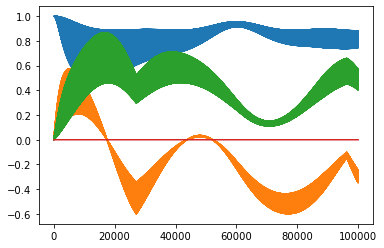

In [6]:
plt.plot(q)
plt.show()

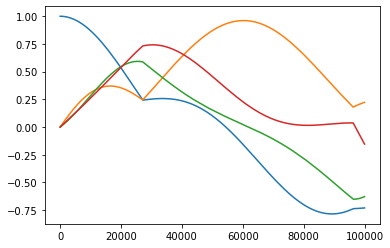

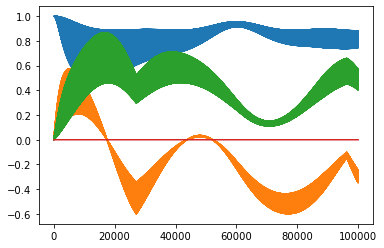

In [7]:
plt.plot(q1)
plt.show()

plt.plot(q)
plt.show()